In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
df = pd.read_csv("data/black-friday.csv")

In [13]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [52]:
df.shape

(550068, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


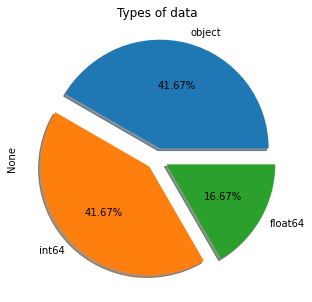

In [53]:
plt.subplots(figsize=(10,5))
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%.2f%%',shadow=True)
plt.title('Types of data')
plt.show();

In [11]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [65]:
#missing values

nan_feat = [feat for feat in df.columns if df[feat].isna().sum()>=1]

for feat in nan_feat:
    print("No. of missing values in",feat, 'is  ---- ',np.round(df[feat].isna().sum()/len(df)*100,2),"%")

No. of missing values in Product_Category_2 is  ----  31.57 %
No. of missing values in Product_Category_3 is  ----  69.67 %


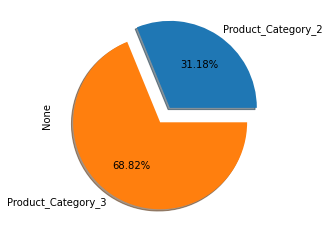

In [80]:
nan = df.isna().sum()
nan[nan>0].plot.pie(explode=[0.1,0.1], shadow=True, autopct="%.2f%%")
plt.show();

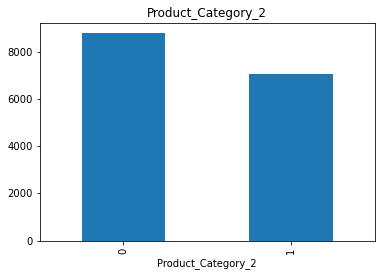

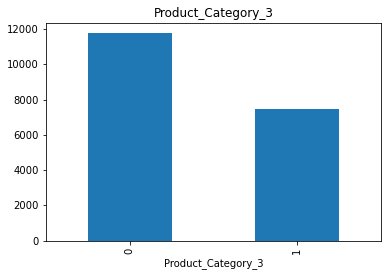

In [50]:
data = df.copy()

for feat in nan_feat:
    data[feat] = np.where(data[feat].isna(),1,0)
    data.groupby(feat)["Purchase"].median().plot.bar()
    plt.title(feat)
    plt.show()

**here, we can observe that where we have missing values there is less purchase as compare to none missing values.**

In [66]:
## Categorical feature

cat_feat = [feat for feat in df.columns if df[feat].dtypes=="O"]
df[cat_feat].head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


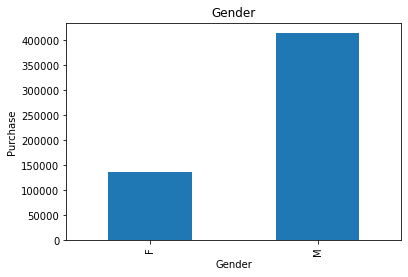

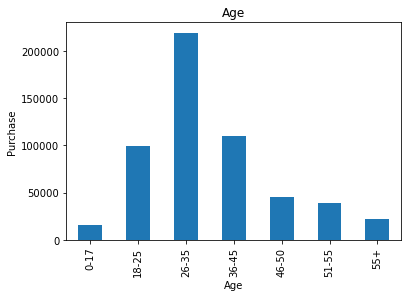

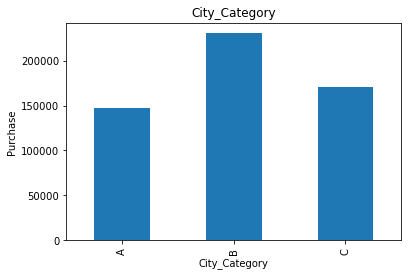

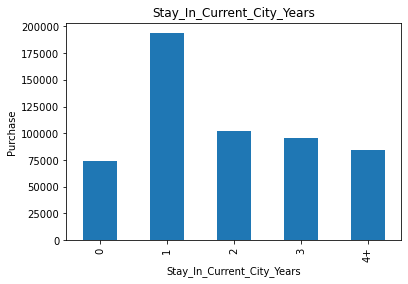

In [207]:
#Checking the relationship between the categorical feature and output feature
data = df.copy()

for feat in cat_feat:
    if feat not in "Product_ID":
        data.groupby(feat)["Purchase"].count().plot.bar()
        plt.title(feat)
        plt.ylabel('Purchase')
        plt.xlabel(feat)
        plt.show();

**here we see the lots of relationships between categorical features and output feature `Purchase`.**

In [170]:
num_feat = [feat for feat in df.columns if feat not in cat_feat]
df[num_feat]

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,10,0,3,NaN,NaN,8370
1,1000001,10,0,1,6.0,14.0,15200
2,1000001,10,0,12,NaN,NaN,1422
3,1000001,10,0,12,14.0,NaN,1057
4,1000002,16,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...
550063,1006033,13,1,20,NaN,NaN,368
550064,1006035,1,0,20,NaN,NaN,371
550065,1006036,15,1,20,NaN,NaN,137
550066,1006038,1,0,20,NaN,NaN,365


In [171]:
df[num_feat].nunique()

User_ID                5891
Occupation               21
Marital_Status            2
Product_Category_1       20
Product_Category_2       17
Product_Category_3       15
Purchase              18105
dtype: int64

**In numerical feature there is no continous feature except `User_ID` which is not important it is just an ID and `Purchase` which is our output feature**

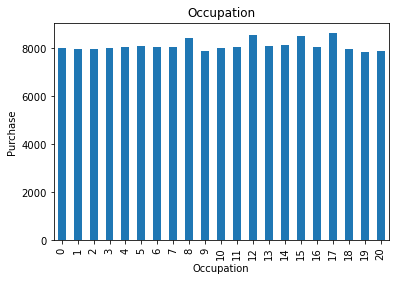

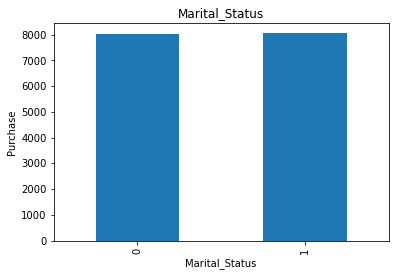

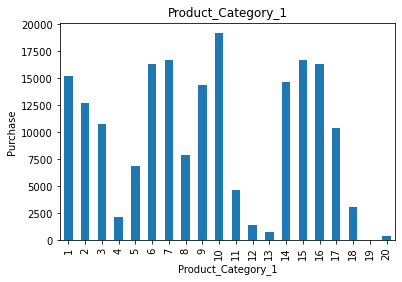

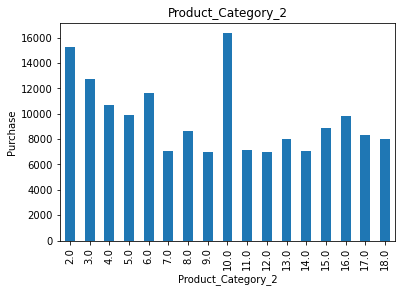

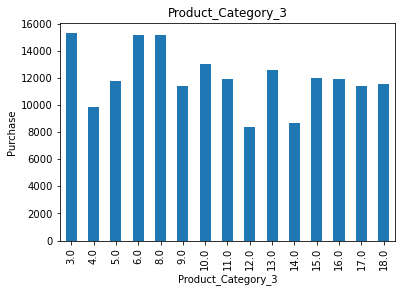

In [187]:
data = df.copy()
for feat in num_feat:
    if feat not in "User_ID"+ "Purchase":
        data.groupby(feat)["Purchase"].median().plot.bar()
        plt.title(feat)
        plt.xlabel(feat)
        plt.ylabel("Purchase")
        plt.show()

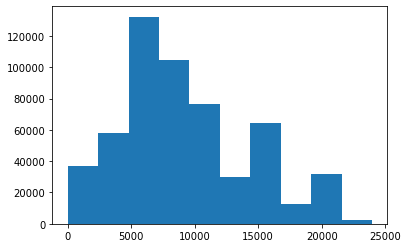

In [208]:
## Checking the distribution of the purchase column
plt.hist(df["Purchase"]);

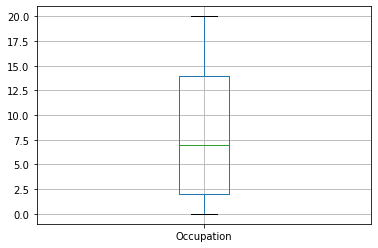

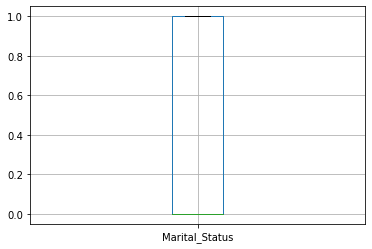

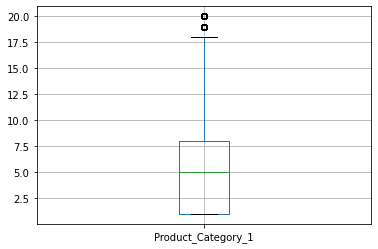

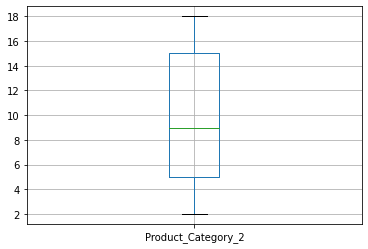

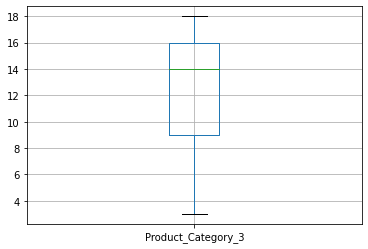

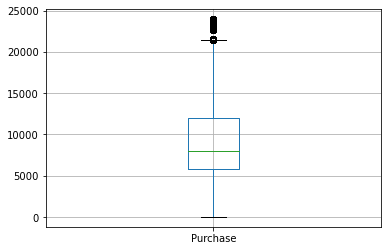

In [197]:
##Checking outliers
for feat in num_feat:
    
    if feat not in "User_ID":
        df.boxplot(feat)
        plt.show()